### CS 457 - Homework Assignment 2: Data Wrangling
### Shahzaib Amir (sa05578)
### Email Address: sa05578@st.habib.edu.pk

### Part 1 Formatting Data

In [284]:
import pandas as pd
import numpy as np

In [285]:
file_read = pd.read_csv('580SurveyCleanup.csv')

In [286]:
df_1 = file_read.iloc[:,1:12]
df_1.columns = df_1.iloc[0]
df_1 = df_1[1:]
df_1.head()

,Time,Status,Duration (Seconds),Access Code,Email Address,IP Address,Country,Region,City / Town / District,Latitude,Longitude
1,10/3/20 5:49 PM,Completed,11646,NaN,NaN,100.36.167.226,United States,Virginia,Fairfax,-77.2891,38.8209
2,10/3/20 5:49 PM,Completed,113,NaN,NaN,98.169.26.134,United States,Virginia,Fairfax,-77.263,38.8605
3,10/3/20 5:49 PM,Completed,572,NaN,NaN,98.169.52.23,United States,Virginia,Greenway Downs,-77.2331,38.9645
4,10/3/20 5:50 PM,Completed,365,NaN,NaN,69.255.182.253,United States,Virginia,Gainesville,-77.6308,38.8175
5,10/3/20 5:51 PM,Completed,92,NaN,NaN,138.88.108.230,United States,NaN,NaN,-97.822,37.751


Getting Q1 columns

In [287]:
df2 = file_read.iloc[:,[12,13]]
df2.head()

,Q1,Q1.1
0,2.0,4.0
1,NaN,1.0
2,1.0,NaN
3,1.0,NaN
4,1.0,NaN


Replacing header with First Row

In [288]:
df2.columns = df2.iloc[0].astype(str)
df2 = df2[1:]
df2.head()

,2.0,4.0
1,NaN,1.0
2,1.0,NaN
3,1.0,NaN
4,1.0,NaN
5,1.0,NaN


Replacing 1 with the assigned column value

In [289]:
df3 = df2.loc[:, '2.0':'4.0'].replace(1, pd.Series(df2.columns, df2.columns)).fillna('')

Concatenate into one single column

In [290]:
df4 = pd.DataFrame(df3.iloc[:,0] + df3.iloc[:,1])
df4.columns = ['Q1']
df4.head()

,Q1
1,4.0
2,2.0
3,2.0
4,2.0
5,2.0


14 to 17 Columns

In [291]:
df14to17 = file_read.iloc[:,[14,15,16,17]]
# df14to17 = file_read.iloc[:,[14,15]]
df14to17.head()

,Q2,Q2.1,Q2.2,Q2.3
0,Male,Female,NonBinary,Prefer not to answer
1,NaN,1,NaN,NaN
2,NaN,1,NaN,NaN
3,1,NaN,NaN,NaN
4,NaN,NaN,NaN,1


In [292]:
df14to17.columns = df14to17.iloc[0].astype(str)
df14to17 = df14to17[1:]
df14to17.head()

,Male,Female,NonBinary,Prefer not to answer
1,NaN,1,NaN,NaN
2,NaN,1,NaN,NaN
3,1,NaN,NaN,NaN
4,NaN,NaN,NaN,1
5,1,NaN,NaN,NaN


Replacing the Gender Specific with the assigned "1" Value 


In [293]:
df5 = df14to17.loc[:, ['Male', 'Female', 'NonBinary', 'Prefer not to answer']].replace('1', pd.Series(df14to17.columns, df14to17.columns)).fillna('')
df5.head()

,Male,Female,NonBinary,Prefer not to answer
1,,Female,,
2,,Female,,
3,Male,,,
4,,,,Prefer not to answer
5,Male,,,


Concatenating into one single column 'Gender'

In [294]:
df6 = pd.DataFrame(df5.iloc[:,0] + df5.iloc[:,1] + df5.iloc[:,2] + df5.iloc[:,3])
df6.columns = ['Gender']
df6.head()

,Gender
1,Female
2,Female
3,Male
4,Prefer not to answer
5,Male


18 to 22 Columns

In [295]:
df18to22 = file_read.iloc[:,18:23]
df18to22.head()

,Q3,Q4,Q5,Q6,Q7
0,Age (years),Height (Inches),Country of Citizenship,Undergraduate Degree,Expected Graduation date from Mason MS program?
1,23,63,Taiwan,economics,2021-12-31
2,24,59,India,Finance,2021-05-01
3,40,70,India,Computer Applications,2022-06-01
4,26,66,South Korea,Business Management,2021-12-31


In [296]:
df18to22.columns = df18to22.iloc[0].astype(str)
df18to22 = df18to22[1:]
df18to22.head()

,Age (years),Height (Inches),Country of Citizenship,Undergraduate Degree,Expected Graduation date from Mason MS program?
1,23,63,Taiwan,economics,2021-12-31
2,24,59,India,Finance,2021-05-01
3,40,70,India,Computer Applications,2022-06-01
4,26,66,South Korea,Business Management,2021-12-31
5,30,70,US,Yes,2021-01-01


23 to 26 Columns

In [297]:
df23to26 = file_read.iloc[:,23:27]
df23to26.head()

,Q8,Q8.1,Q8.2,Q8.3
0,Microsoft/Windows,Apple/MacBook,Other,NaN
1,NaN,1,NaN,NaN
2,NaN,1,NaN,NaN
3,NaN,1,NaN,NaN
4,1,NaN,NaN,NaN


In [298]:
df23to26.columns = df23to26.iloc[0].astype(str)
df23to26 = df23to26[1:]
df23to26.drop(["nan"], axis=1, inplace=True)
df23to26["Apple/MacBook"].replace({"2": "1"}, inplace=True)
df23to26.head()

,Microsoft/Windows,Apple/MacBook,Other
1,NaN,1,NaN
2,NaN,1,NaN
3,NaN,1,NaN
4,1,NaN,NaN
5,NaN,1,NaN


In [299]:
df7 = df23to26.loc[:, ['Microsoft/Windows', 'Apple/MacBook', 'Other']].replace('1', pd.Series(df23to26.columns, df23to26.columns)).fillna('')
df7.head()

,Microsoft/Windows,Apple/MacBook,Other
1,,Apple/MacBook,
2,,Apple/MacBook,
3,,Apple/MacBook,
4,Microsoft/Windows,,
5,,Apple/MacBook,


In [300]:
df8 = pd.DataFrame(df7.iloc[:,0] + df7.iloc[:,1] + df7.iloc[:,2] )
df8.columns = ['TypeOfLaptopUsed']
df8.head()

,TypeOfLaptopUsed
1,Apple/MacBook
2,Apple/MacBook
3,Apple/MacBook
4,Microsoft/Windows
5,Apple/MacBook


27 to 29 Columns

In [301]:
df27to29 = file_read.iloc[:,27:30]
df27to29.head()

,Q9,Q9.1,Q9.2
0,"Yes, Full Time","Working, but not Full Time",Not Working while attending Mason
1,NaN,NaN,1
2,NaN,1,NaN
3,1,NaN,NaN
4,NaN,NaN,1


In [302]:
df27to29.columns = df27to29.iloc[0].astype(str)
df27to29 = df27to29[1:]
df27to29.head()

,"Yes, Full Time","Working, but not Full Time",Not Working while attending Mason
1,NaN,NaN,1
2,NaN,1,NaN
3,1,NaN,NaN
4,NaN,NaN,1
5,1,NaN,NaN


In [303]:
df9 = df27to29.loc[:, ['Yes, Full Time', 'Working, but not Full Time', 'Not Working while attending Mason']].replace('1', pd.Series(df27to29.columns, df27to29.columns)).fillna('')
df9.head()

,"Yes, Full Time","Working, but not Full Time",Not Working while attending Mason
1,,,Not Working while attending Mason
2,,"Working, but not Full Time",
3,"Yes, Full Time",,
4,,,Not Working while attending Mason
5,"Yes, Full Time",,


In [304]:
df10 = pd.DataFrame(df9.iloc[:,0] + df9.iloc[:,1] + df9.iloc[:,2] )
df10.columns = ['Are_you_employed_full-time_while_attending_Mason?']
df10.head()

,Are_you_employed_full-time_while_attending_Mason?
1,Not Working while attending Mason
2,"Working, but not Full Time"
3,"Yes, Full Time"
4,Not Working while attending Mason
5,"Yes, Full Time"


30 to 34 Columns

In [305]:
df30to35 = file_read.iloc[:,30:35]
df30to35.head()

,Q10,Q10.1,Q10.2,Q10.3,Q10.4
0,Little/none,Some familiarity,Average user,Frequent use for projects,Fluent/expert
1,NaN,1,NaN,NaN,NaN
2,NaN,NaN,1,NaN,NaN
3,NaN,1,NaN,NaN,NaN
4,NaN,NaN,1,NaN,NaN


In [306]:
df30to35.columns = df30to35.iloc[0].astype(str)
df30to35 = df30to35[1:]
df30to35.head()

,Little/none,Some familiarity,Average user,Frequent use for projects,Fluent/expert
1,NaN,1,NaN,NaN,NaN
2,NaN,NaN,1,NaN,NaN
3,NaN,1,NaN,NaN,NaN
4,NaN,NaN,1,NaN,NaN
5,NaN,1,NaN,NaN,NaN


In [307]:
df11 = df30to35.loc[:, ['Little/none', 'Some familiarity', 'Average user', 'Frequent use for projects', 'Fluent/expert']].replace('1', pd.Series(df30to35.columns, df30to35.columns)).fillna('')
df11.head()

,Little/none,Some familiarity,Average user,Frequent use for projects,Fluent/expert
1,,Some familiarity,,,
2,,,Average user,,
3,,Some familiarity,,,
4,,,Average user,,
5,,Some familiarity,,,


In [308]:
df12 = pd.DataFrame(df11.iloc[:,0] + df11.iloc[:,1] + df11.iloc[:,2] + df11.iloc[:,3] + df11.iloc[:,4])
df12.columns = ['What_is_your_approximate_current_level_of_programming_skill_in_Python?']
df12.head()

,What_is_your_approximate_current_level_of_programming_skill_in_Python?
1,Some familiarity
2,Average user
3,Some familiarity
4,Average user
5,Some familiarity


35 to 39 Columns

In [309]:
df35to39 = file_read.iloc[:,35:40]
df35to39.head()

,Q11,Q11.1,Q11.2,Q11.3,Q11.4
0,Little/none,Some familiarity,Average user,Frequent use for projects,Fluent/expert
1,1,NaN,NaN,NaN,NaN
2,NaN,NaN,1,NaN,NaN
3,1,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1,NaN


In [310]:
df35to39.columns = df35to39.iloc[0].astype(str)
df35to39 = df35to39[1:]
df35to39.head()

,Little/none,Some familiarity,Average user,Frequent use for projects,Fluent/expert
1,1,NaN,NaN,NaN,NaN
2,NaN,NaN,1,NaN,NaN
3,1,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1,NaN
5,NaN,1,NaN,NaN,NaN


In [311]:
df13 = df35to39.loc[:, ['Little/none', 'Some familiarity', 'Average user', 'Frequent use for projects', 'Fluent/expert']].replace('1', pd.Series(df35to39.columns, df35to39.columns)).fillna('')
df13.head()

,Little/none,Some familiarity,Average user,Frequent use for projects,Fluent/expert
1,Little/none,,,,
2,,,Average user,,
3,Little/none,,,,
4,,,,Frequent use for projects,
5,,Some familiarity,,,


In [312]:
df14 = pd.DataFrame(df13.iloc[:,0] + df13.iloc[:,1] + df13.iloc[:,2] + df13.iloc[:,3] + df13.iloc[:,4])
df14.columns = ['What_is_your_approximate_current_level_of_programming_skill_in_R?']
df14.head()

,What_is_your_approximate_current_level_of_programming_skill_in_R?
1,Little/none
2,Average user
3,Little/none
4,Frequent use for projects
5,Some familiarity


40 to 44 Columns

In [313]:
df40to44 = file_read.iloc[:,40:45]
df40to44.head()

,Q12,Q12.1,Q12.2,Q12.3,Q12.4
0,Little/none,Some familiarity,Average user,Frequent use for projects,Fluent/expert
1,NaN,1,NaN,NaN,NaN
2,1,NaN,NaN,NaN,NaN
3,NaN,NaN,1,NaN,NaN
4,NaN,1,NaN,NaN,NaN


In [314]:
df40to44.columns = df40to44.iloc[0].astype(str)
df40to44 = df40to44[1:]
df40to44.head()

,Little/none,Some familiarity,Average user,Frequent use for projects,Fluent/expert
1,NaN,1,NaN,NaN,NaN
2,1,NaN,NaN,NaN,NaN
3,NaN,NaN,1,NaN,NaN
4,NaN,1,NaN,NaN,NaN
5,NaN,NaN,1,NaN,NaN


In [315]:
df15 = df40to44.loc[:, ['Little/none', 'Some familiarity', 'Average user', 'Frequent use for projects', 'Fluent/expert']].replace('1', pd.Series(df40to44.columns, df40to44.columns)).fillna('')
df15.head()

,Little/none,Some familiarity,Average user,Frequent use for projects,Fluent/expert
1,,Some familiarity,,,
2,Little/none,,,,
3,,,Average user,,
4,,Some familiarity,,,
5,,,Average user,,


In [316]:
df16 = pd.DataFrame(df15.iloc[:,0] + df15.iloc[:,1] + df15.iloc[:,2] + df15.iloc[:,3] + df15.iloc[:,4])
df16.columns = ['What_is_your_approximate_current_level_of_programming_skill_in_SQL?']
df16.head()

,What_is_your_approximate_current_level_of_programming_skill_in_SQL?
1,Some familiarity
2,Little/none
3,Average user
4,Some familiarity
5,Average user


45 Column

In [317]:
df45 = file_read.iloc[:,45:]
df45.head()

,Q13
0,What is your goal for learning about data anal...
1,NaN
2,NaN
3,"As part of my work, I have access to a lot of ..."
4,NaN


In [318]:
df45.columns = df45.iloc[0].astype(str)
df45 = df45[1:]
df45.head()

,What is your goal for learning about data analytics?
1,NaN
2,NaN
3,"As part of my work, I have access to a lot of ..."
4,NaN
5,Learn


Writing a csv file

In [319]:
final_df = pd.concat([df_1, df4, df6, df18to22, df8,  df10,  df12,  df14,  df16, df45], axis = 1)
column_names = ['Time', 'Status', 'Duration(Seconds)', 'Access_Code', 'Email_Address', 'IP_Address', 'Country', 'Region', 'City/Town/District', 'Latitude', 'Longitude', 'Q1', 'Gender', 'Age(years)', 'Height(Inches)', 'Country_of_Citizenship', 'Undergraduate_Degree', 'Expected_Graduation_date_from_Mason_MS_program?', 'Type_Of_Laptop_Used', 
'Are_you_employed_full-time_while_attending_Mason?', 'What_is_your_approximate_current_level_of_programming_skill_in_Python?', 
'What_is_your_approximate_current_level_of_programming_skill_in_R?', 'What_is_your_approximate_current_level_of_programming_skill_in_SQL?', 
'What_is_your_goal_for_learning_about_data_analytics?']
final_df.to_csv('580SurveyCleanup_formatted.csv', index = False, header = column_names)

### Part 2 Cleaning Data 

In [320]:
file_read2 = pd.read_csv('580SurveyCleanup_formatted.csv')
file_read2.columns[file_read2.isnull().any()]
p2_df = file_read2.iloc[:,0:]
p2_df.head()

,Time,Status,Duration(Seconds),Access_Code,Email_Address,IP_Address,Country,Region,City/Town/District,Latitude,...,Height(Inches),Country_of_Citizenship,Undergraduate_Degree,Expected_Graduation_date_from_Mason_MS_program?,Type_Of_Laptop_Used,Are_you_employed_full-time_while_attending_Mason?,What_is_your_approximate_current_level_of_programming_skill_in_Python?,What_is_your_approximate_current_level_of_programming_skill_in_R?,What_is_your_approximate_current_level_of_programming_skill_in_SQL?,What_is_your_goal_for_learning_about_data_analytics?
0,10/3/20 5:49 PM,Completed,11646,NaN,NaN,100.36.167.226,United States,Virginia,Fairfax,-77.2891,...,63,Taiwan,economics,2021-12-31,Apple/MacBook,Not Working while attending Mason,Some familiarity,Little/none,Some familiarity,NaN
1,10/3/20 5:49 PM,Completed,113,NaN,NaN,98.169.26.134,United States,Virginia,Fairfax,-77.2630,...,59,India,Finance,2021-05-01,Apple/MacBook,"Working, but not Full Time",Average user,Average user,Little/none,NaN
2,10/3/20 5:49 PM,Completed,572,NaN,NaN,98.169.52.23,United States,Virginia,Greenway Downs,-77.2331,...,70,India,Computer Applications,2022-06-01,Apple/MacBook,"Yes, Full Time",Some familiarity,Little/none,Average user,"As part of my work, I have access to a lot of ..."
3,10/3/20 5:50 PM,Completed,365,NaN,NaN,69.255.182.253,United States,Virginia,Gainesville,-77.6308,...,66,South Korea,Business Management,2021-12-31,Microsoft/Windows,Not Working while attending Mason,Average user,Frequent use for projects,Some familiarity,NaN
4,10/3/20 5:51 PM,Completed,92,NaN,NaN,138.88.108.230,United States,NaN,NaN,-97.8220,...,70,US,Yes,2021-01-01,Apple/MacBook,"Yes, Full Time",Some familiarity,Some familiarity,Average user,Learn


Investigating Each Column

In [321]:
is_NaN = p2_df.isnull()
row_has_NaN = is_NaN.any(axis = 1)
rows_with_NaN = p2_df[row_has_NaN]

print(rows_with_NaN)
## Reference: https://www.kite.com/python/answers/how-to-find-rows-with-nan-values-in-a-pandas-dataframe-in-python

                Time      Status  Duration(Seconds)  Access_Code  \
0    10/3/20 5:49 PM   Completed              11646          NaN   
1    10/3/20 5:49 PM   Completed                113          NaN   
2    10/3/20 5:49 PM   Completed                572          NaN   
3    10/3/20 5:50 PM   Completed                365          NaN   
4    10/3/20 5:51 PM   Completed                 92          NaN   
5    10/3/20 5:59 PM  Incomplete                221          NaN   
6    10/3/20 6:23 PM   Completed             115983          NaN   
7    10/3/20 7:10 PM  Incomplete                 40          NaN   
8    10/3/20 7:25 PM   Completed                137          NaN   
9    10/3/20 7:56 PM  Incomplete                179          NaN   
10   10/3/20 8:14 PM   Completed                127          NaN   
11   10/3/20 9:38 PM   Completed                269          NaN   
12   10/3/20 9:41 PM   Completed                117          NaN   
13  10/3/20 10:49 PM   Completed               5

Dropping Access_Code and Email_Address Since both the columns are completely empty

In [322]:
p2_df = p2_df.drop(['Access_Code', 'Email_Address'], axis = 1)

Region

In [323]:
## To maintaing the consistency of th data 
region_replacement = {np.nan : 'Not mentioned'}
p2_df['Region'] = p2_df['Region'].replace(region_replacement)
p2_df['Region']

0          Virginia
1          Virginia
2          Virginia
3          Virginia
4     Not mentioned
5          Virginia
6          Virginia
7          Virginia
8          Virginia
9             Texas
10         Maryland
11         Virginia
12         Virginia
13         Virginia
14         Maryland
15         Maryland
16         Virginia
17         Virginia
18         Virginia
19         Virginia
20         Virginia
21         Virginia
22         Maryland
23    Not mentioned
24    Not mentioned
25         Virginia
26         Virginia
27         Virginia
28         Maryland
29         Virginia
30         Virginia
31         Virginia
32         Virginia
33    Not mentioned
34         Maryland
35         Virginia
Name: Region, dtype: object

City/Town/District

In [324]:
## To maintaing the consistency of th data 
city_replacement = {np.nan : 'Not mentioned'}
p2_df['City/Town/District'] = p2_df['City/Town/District'].replace(city_replacement)
p2_df['City/Town/District']

0            Fairfax
1            Fairfax
2     Greenway Downs
3        Gainesville
4      Not mentioned
5             Reston
6          Arlington
7            Ashburn
8         Woodbridge
9      Not mentioned
10       Takoma Park
11           Fairfax
12         Chantilly
13             Burke
14       Hyattsville
15         Baltimore
16         Arlington
17       Springfield
18        Woodbridge
19          Rustburg
20           Fairfax
21            Reston
22         Baltimore
23     Not mentioned
24     Not mentioned
25             Burke
26           Fairfax
27             Burke
28         Baltimore
29       Springfield
30            Lorton
31             Burke
32      Falls Church
33     Not mentioned
34         Frederick
35           Fairfax
Name: City/Town/District, dtype: object

Age(years)

In [325]:
p2_df['Age(years)'].str.strip() ## to remove any whitespaces if they exist

## Errors occured by the user while inputting the data thus correcting them 
# len(p2_df['Age(years)'][17])
p2_df['Age(years)'] = p2_df['Age(years)'].str.replace('2 3', '23') ## NOT SOLVED
p2_df['Age(years)'] = p2_df['Age(years)'].str.replace('1993', str(2022 - 1993)) 
p2_df['Age(years)']


0     23
1     24
2     40
3     26
4     30
5     25
6     24
7     30
8     24
9     26
10    24
11    25
12    25
13    23
14    31
15    26
16    40
17    23
18    25
19    22
20    23
21    25
22    22
23    23
24    27
25    28
26    23
27    35
28    27
29    25
30    55
31    23
32    29
33    23
34    24
35    28
Name: Age(years), dtype: object

Height(inches)

In [326]:
##Removing Whitespace if exists
p2_df['Height(Inches)'].str.strip() 
# print(p2_df.dtypes)

# ##Removing user errors occured duting input
vals_to_replace = {'5.2':'52', '6l':'61', '7O':'70', np.nan: '0'}
p2_df['Height(Inches)'] = p2_df['Height(Inches)'].replace(vals_to_replace)

##Replacing Mean Age in place of NaN to maintain the consistency in the data
p2_df = p2_df.astype({'Height(Inches)': int})
column_means = int(p2_df['Height(Inches)'].mean())
p2_df['Height(Inches)'] = p2_df['Height(Inches)'].replace(0, column_means)
p2_df['Height(Inches)']

0     63
1     59
2     70
3     66
4     70
5     65
6     70
7     52
8     71
9     71
10    66
11    66
12    69
13    66
14    67
15    72
16    68
17    60
18    67
19    67
20    74
21    65
22    67
23    75
24    67
25    68
26    72
27    61
28    64
29    71
30    56
31    70
32    70
33    73
34    68
35    66
Name: Height(Inches), dtype: int32

Country_of_Citizenship

In [327]:
##Removing whitespaces and making first letter of the country name as capital
p2_df['Country_of_Citizenship'] = p2_df['Country_of_Citizenship'].str.strip()
p2_df['Country_of_Citizenship'] = p2_df['Country_of_Citizenship'].str.title()

country_replacement = {np.nan : "Not mentioned"}
##Replacing multiple names of the same entity
idx = p2_df['Country_of_Citizenship'].str.contains('Us', na = False)
p2_df.loc[idx,'Country_of_Citizenship'] = 'United States of America'
p2_df['Country_of_Citizenship'] = p2_df['Country_of_Citizenship'].str.replace('United States ; Pakistan', 'United States of America') ## Considering the first country entered to be 
                                                                                                    ## the correct one and ignoring the next one
p2_df['Country_of_Citizenship'] = p2_df['Country_of_Citizenship'].replace(country_replacement)
p2_df['Country_of_Citizenship']

0                       Taiwan
1                        India
2                        India
3                  South Korea
4     United States of America
5                Not mentioned
6                     Pakistan
7                Not mentioned
8                        China
9                   Uzbekistan
10    United States of America
11                       India
12                     Romania
13                       India
14                       China
15                  Uzbekistan
16    United States of America
17                       India
18                    Ethiopia
19               United States
20               United States
21                       India
22    United States of America
23                     Nigeria
24    United States of America
25                      Taiwan
26                       India
27                     Nigeria
28                       India
29                       India
30               United States
31                       India
32    Un

Undergraduate_Degree

In [328]:
##Removing whitespaces and making first letter of the undergraduate degree as capital
p2_df['Undergraduate_Degree'] = p2_df['Undergraduate_Degree'].str.strip()
# p2_df['Undergraduate_Degree'] = p2_df['Undergraduate_Degree'].str.title()

##Replacing multiple names of the same entity
idx_2 = p2_df['Undergraduate_Degree'].str.contains('econo', na = False)
idx_3 = p2_df['Undergraduate_Degree'].str.contains('computer science', na = False)
p2_df.loc[idx_2,'Undergraduate_Degree'] = 'Economics'
p2_df.loc[idx_3,'Undergraduate_Degree'] = 'Computer Science'

## Handling the case where user has not mentioned the name of the degree
replacing_degrees = {'Yes':'Graduated but name of degree not mentioned', np.nan : 'Not mentioned'}
p2_df['Undergraduate_Degree'] = p2_df['Undergraduate_Degree'].replace(replacing_degrees)
p2_df['Undergraduate_Degree']

0                                      Economics
1                                        Finance
2                          Computer Applications
3                            Business Management
4     Graduated but name of degree not mentioned
5                                  Not mentioned
6                                        Finance
7                                  Not mentioned
8                                       Economic
9                         Economics with Finance
10                                           BIT
11                          Computer Engineering
12                                       Biology
13                                           Cse
14                                    Management
15                        Economics with Finance
16                                     Economics
17                                   Engineering
18                           Accounting and ISOM
19                                    Statistics
20                  

Expected_Graduation_date_from_Mason_MS_program? 
Date Format is mm/dd/yyy

In [329]:
date_replacement = {np.nan : "Not mentioned"}
p2_df['Expected_Graduation_date_from_Mason_MS_program?'] = p2_df['Expected_Graduation_date_from_Mason_MS_program?'].replace(date_replacement)
p2_df['Expected_Graduation_date_from_Mason_MS_program?']

0        2021-12-31
1        2021-05-01
2        2022-06-01
3        2021-12-31
4        2021-01-01
5     Not mentioned
6        2022-07-15
7     Not mentioned
8        2021-12-15
9     Not mentioned
10       2022-05-01
11       2021-05-31
12       2021-08-26
13       2021-12-25
14       2021-12-31
15       2022-05-01
16       2022-05-31
17       2021-01-12
18       2021-12-20
19       2021-12-20
20       2022-05-01
21       2022-04-16
22       2021-12-18
23       2021-05-14
24       2022-12-19
25       2021-05-30
26       2021-12-11
27       2023-05-24
28       2021-12-30
29       2021-12-15
30       2021-05-01
31       2021-12-21
32       2021-12-18
33       2022-05-15
34       2022-12-12
35       2021-12-20
Name: Expected_Graduation_date_from_Mason_MS_program?, dtype: object

Type_Of_Laptop_Used

In [330]:
laptop_replacement = {'0': 'Other', np.nan : 'Other'}

## Replacing empty and 0 value to Other to maintain the consistency of the data because the user might be using some other product other than mentioned in the survey
p2_df['Type_Of_Laptop_Used'] = p2_df['Type_Of_Laptop_Used'].replace(laptop_replacement)
p2_df['Type_Of_Laptop_Used']

0                      Apple/MacBook
1                      Apple/MacBook
2                      Apple/MacBook
3                  Microsoft/Windows
4                      Apple/MacBook
5                              Other
6                  Microsoft/Windows
7                              Other
8                  Microsoft/Windows
9                              Other
10                 Microsoft/Windows
11                 Microsoft/Windows
12                     Apple/MacBook
13                 Microsoft/Windows
14                 Microsoft/Windows
15                 Microsoft/Windows
16    Microsoft/WindowsApple/MacBook
17                 Microsoft/Windows
18                 Microsoft/Windows
19                     Apple/MacBook
20                 Microsoft/Windows
21                 Microsoft/Windows
22    Microsoft/WindowsApple/MacBook
23                 Microsoft/Windows
24                 Microsoft/Windows
25                             Other
26                     Apple/MacBook
2

Are_you_employed_full-time_while_attending_Mason?

In [331]:
## Replacing NaN values with Not working to maintain the data consistency because the options were clear and not entering means not working (an assumption taken)
employment_replacement = {np.nan : 'Not Working while attending Mason'}
p2_df['Are_you_employed_full-time_while_attending_Mason?'] = p2_df['Are_you_employed_full-time_while_attending_Mason?'].replace(employment_replacement)
p2_df['Are_you_employed_full-time_while_attending_Mason?']

0     Not Working while attending Mason
1            Working, but not Full Time
2                        Yes, Full Time
3     Not Working while attending Mason
4                        Yes, Full Time
5     Not Working while attending Mason
6            Working, but not Full Time
7     Not Working while attending Mason
8                        Yes, Full Time
9     Not Working while attending Mason
10    Not Working while attending Mason
11    Not Working while attending Mason
12           Working, but not Full Time
13    Not Working while attending Mason
14    Not Working while attending Mason
15    Not Working while attending Mason
16                       Yes, Full Time
17    Not Working while attending Mason
18    Not Working while attending Mason
19           Working, but not Full Time
20                       Yes, Full Time
21    Not Working while attending Mason
22           Working, but not Full Time
23    Not Working while attending Mason
24                       Yes, Full Time


What_is_your_approximate_current_level_of_programming_skill_in_Python?

What_is_your_approximate_current_level_of_programming_skill_in_R?

What_is_your_approximate_current_level_of_programming_skill_in_SQL?


In [332]:
## Replacing NaN values with Not working to maintain the data consistency because the options were clear and not entering means none experience (an assumption taken)
skills_replacement = {np.nan : 'Little/none'}
p2_df['What_is_your_approximate_current_level_of_programming_skill_in_Python?'] = p2_df['What_is_your_approximate_current_level_of_programming_skill_in_Python?'].replace(skills_replacement)
p2_df['What_is_your_approximate_current_level_of_programming_skill_in_R?'] = p2_df['What_is_your_approximate_current_level_of_programming_skill_in_R?'].replace(skills_replacement)
p2_df['What_is_your_approximate_current_level_of_programming_skill_in_SQL?'] = p2_df['What_is_your_approximate_current_level_of_programming_skill_in_SQL?'].replace(skills_replacement)


In [333]:
p2_df['What_is_your_approximate_current_level_of_programming_skill_in_Python?']

0              Some familiarity
1                  Average user
2              Some familiarity
3                  Average user
4              Some familiarity
5                   Little/none
6                  Average user
7                   Little/none
8              Some familiarity
9                   Little/none
10                  Little/none
11    Frequent use for projects
12             Some familiarity
13                 Average user
14                 Average user
15             Some familiarity
16                 Average user
17    Frequent use for projects
18                  Little/none
19             Some familiarity
20             Some familiarity
21             Some familiarity
22             Some familiarity
23                  Little/none
24                 Average user
25                 Average user
26                 Average user
27                 Average user
28                 Average user
29                 Average user
30                  Little/none
31      

In [334]:
p2_df['What_is_your_approximate_current_level_of_programming_skill_in_R?']

0                   Little/none
1                  Average user
2                   Little/none
3     Frequent use for projects
4              Some familiarity
5                   Little/none
6                  Average user
7                   Little/none
8     Frequent use for projects
9                   Little/none
10                  Little/none
11                 Average user
12                 Average user
13                 Average user
14                  Little/none
15             Some familiarity
16             Some familiarity
17    Frequent use for projects
18                  Little/none
19                Fluent/expert
20             Some familiarity
21                  Little/none
22    Frequent use for projects
23                  Little/none
24                 Average user
25             Some familiarity
26    Frequent use for projects
27    Frequent use for projects
28                 Average user
29                 Average user
30             Some familiarity
31    Fr

In [335]:
p2_df['What_is_your_approximate_current_level_of_programming_skill_in_SQL?']

0              Some familiarity
1                   Little/none
2                  Average user
3              Some familiarity
4                  Average user
5                   Little/none
6                  Average user
7                   Little/none
8                  Average user
9                   Little/none
10             Some familiarity
11    Frequent use for projects
12                 Average user
13                 Average user
14                  Little/none
15             Some familiarity
16             Some familiarity
17                 Average user
18                 Average user
19                 Average user
20             Some familiarity
21                 Average user
22                  Little/none
23                  Little/none
24                 Average user
25             Some familiarity
26                 Average user
27                 Average user
28                 Average user
29    Frequent use for projects
30             Some familiarity
31    Fr

What_is_your_goal_for_learning_about_data_analytics?

In [336]:
learning_replacement = {np.nan : 'No Response'}

## Replacing empty and 0 value to Other to maintain the consistency of the data because the user might be using some other product other than mentioned in the survey
p2_df['What_is_your_goal_for_learning_about_data_analytics?'] = p2_df['What_is_your_goal_for_learning_about_data_analytics?'].replace(learning_replacement)
p2_df['What_is_your_goal_for_learning_about_data_analytics?']

0                                           No Response
1                                           No Response
2     As part of my work, I have access to a lot of ...
3                                           No Response
4                                                 Learn
5                                           No Response
6     To deduce meaningful interpretation for Financ...
7                                           No Response
8                                           No Response
9                                           No Response
10    To see if it is a field I am interested in pur...
11    To learn and explore cutting edge data technol...
12    Learn to select the appropriate tools to condu...
13                                          No Response
14                                    improve my skills
15    My professional goal is to become a Financial ...
16    able to compliment my Computational Social Sci...
17                                  To start a c

Exporting the File for output

In [337]:
column_names = ['Time', 'Status', 'Duration(Seconds)', 'IP_Address', 'Country', 'Region', 'City/Town/District', 'Latitude', 'Longitude', 'Q1', 'Gender', 'Age(years)', 'Height(Inches)', 'Country_of_Citizenship', 'Undergraduate_Degree', 'Expected_Graduation_date_from_Mason_MS_program?', 'Type_Of_Laptop_Used', 
'Are_you_employed_full_time_while_attending_Mason?', 'What_is_your_approximate_current_level_of_programming_skill_in_Python?', 
'What_is_your_approximate_current_level_of_programming_skill_in_R?', 'What_is_your_approximate_current_level_of_programming_skill_in_SQL?', 
'What_is_your_goal_for_learning_about_data_analytics?']
p2_df.to_csv('580SurveyCleanup_cleaned.csv', index = False, header = column_names)

### Part 3 Statistical Representation


In [338]:
file_read3 = pd.read_csv('580SurveyCleanup_cleaned.csv')
p3_df = file_read3.iloc[:,0:]
p3_df.head()

,Time,Status,Duration(Seconds),IP_Address,Country,Region,City/Town/District,Latitude,Longitude,Q1,...,Height(Inches),Country_of_Citizenship,Undergraduate_Degree,Expected_Graduation_date_from_Mason_MS_program?,Type_Of_Laptop_Used,Are_you_employed_full_time_while_attending_Mason?,What_is_your_approximate_current_level_of_programming_skill_in_Python?,What_is_your_approximate_current_level_of_programming_skill_in_R?,What_is_your_approximate_current_level_of_programming_skill_in_SQL?,What_is_your_goal_for_learning_about_data_analytics?
0,10/3/20 5:49 PM,Completed,11646,100.36.167.226,United States,Virginia,Fairfax,-77.2891,38.8209,4.0,...,63,Taiwan,Economics,2021-12-31,Apple/MacBook,Not Working while attending Mason,Some familiarity,Little/none,Some familiarity,No Response
1,10/3/20 5:49 PM,Completed,113,98.169.26.134,United States,Virginia,Fairfax,-77.2630,38.8605,2.0,...,59,India,Finance,2021-05-01,Apple/MacBook,"Working, but not Full Time",Average user,Average user,Little/none,No Response
2,10/3/20 5:49 PM,Completed,572,98.169.52.23,United States,Virginia,Greenway Downs,-77.2331,38.9645,2.0,...,70,India,Computer Applications,2022-06-01,Apple/MacBook,"Yes, Full Time",Some familiarity,Little/none,Average user,"As part of my work, I have access to a lot of ..."
3,10/3/20 5:50 PM,Completed,365,69.255.182.253,United States,Virginia,Gainesville,-77.6308,38.8175,2.0,...,66,South Korea,Business Management,2021-12-31,Microsoft/Windows,Not Working while attending Mason,Average user,Frequent use for projects,Some familiarity,No Response
4,10/3/20 5:51 PM,Completed,92,138.88.108.230,United States,Not mentioned,Not mentioned,-97.8220,37.7510,2.0,...,70,United States of America,Graduated but name of degree not mentioned,2021-01-01,Apple/MacBook,"Yes, Full Time",Some familiarity,Some familiarity,Average user,Learn


Plotting types of Laptop Used

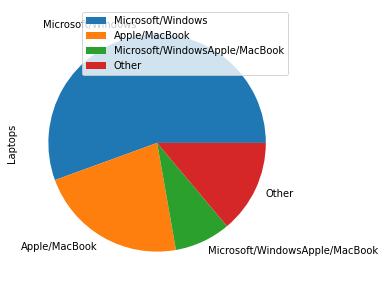

In [339]:
Microsoft_counter = p3_df[p3_df.Type_Of_Laptop_Used == 'Microsoft/Windows'].shape[0]
Apple_counter = p3_df[p3_df.Type_Of_Laptop_Used == 'Apple/MacBook'].shape[0]
Both_counter = p3_df[p3_df.Type_Of_Laptop_Used == 'Microsoft/WindowsApple/MacBook'].shape[0]
Other_counter = p3_df[p3_df.Type_Of_Laptop_Used == 'Other'].shape[0]

## USing Pieplot to show the difference in the number of user using different brands of Laptop
df = pd.DataFrame({'Laptops': [Microsoft_counter, Apple_counter , Both_counter, Other_counter]},
                  index=['Microsoft/Windows', 'Apple/MacBook', 'Microsoft/WindowsApple/MacBook', 'Other'])
plot = df.plot.pie(y='Laptops', figsize=(5, 5))
##Reference https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html


By seeing the above pie chart, we can see that people are tend to use more Microsoft/Windows Laptops than Apple/Macbook which is its competitor in the Tech Market. In fact more, than 50% people who participated in the survey use Microsoft/Windows Laptops

Gender 

Representing using Bar Chart to show the gender distribution across the whole data and to reduce gender discrimination, to let people know that anyone can take part in the survey


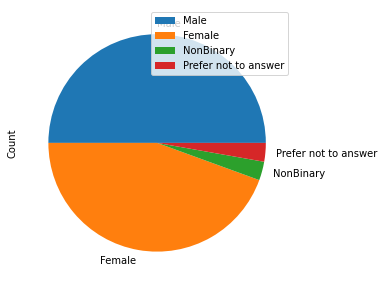

In [340]:
Male_counter = p3_df[p3_df.Gender == 'Male'].shape[0]
Female_counter = p3_df[p3_df.Gender == 'Female'].shape[0]
NonBinary_counter = p3_df[p3_df.Gender == 'NonBinary'].shape[0]
Prefernottoanswer_counter = p3_df[p3_df.Gender == 'Prefer not to answer'].shape[0]

b_df = pd.DataFrame({'Count':[Male_counter, Female_counter, NonBinary_counter, Prefernottoanswer_counter]}, index = ['Male', 'Female', 'NonBinary', 'Prefer not to answer'])
ax = b_df.plot.pie(y='Count', figsize = (5,5))
## More participation is required from every gender

The above pie chart shows the gender distribution. The special purpose for this pie chart was to show boost the people who participated in the surveys and were not afraid to mention different genders, to remove gender discrimination we would need more of these people. Appreciation to those who answered and request for others to participate as well to raise voice against gender discrimination. :)

Mode of the Height(Inches) just to get an insight of who is the tallest (Just for Fun)

In [341]:
max_height = p3_df['Height(Inches)'].max()
print("The maximum height recorded in inches is:", max_height, "inches.")

The maximum height recorded in inches is: 75 inches.


Mean Age of the people who took part in the survey

In [342]:
mean_age = p3_df['Age(years)'].astype(int).mean()
print("Mean Age of the people who took part in the survey is:", int(mean_age), "years.")

Mean Age of the people who took part in the survey is: 27 years.


Uniqueness in Undergraduate Degree

In [343]:
## To determine the number of undergraduate degrees held by survey participants in order to determine the number of students attending various universities.

# Get number of unique values in column 'C'
print("The number of unique undergraduate degrees:", p3_df.Undergraduate_Degree.nunique(dropna = True))
print("The unique values are shown below:\n", p3_df.Undergraduate_Degree.unique())

The number of unique undergraduate degrees: 29
The unique values are shown below:
 ['Economics' 'Finance' 'Computer Applications' 'Business Management'
 'Graduated but name of degree not mentioned' 'Not mentioned' 'Economic'
 'Economics with Finance' 'BIT' 'Computer Engineering' 'Biology' 'Cse'
 'Management' 'Engineering' 'Accounting and ISOM' 'Statistics'
 'Computer Science' 'Computer science' 'Mathematics & Statistics'
 'Systems Engineering' 'Civil engineering' 'ECE' 'Quantity Surveying'
 'Bachelor of Engineering' 'B.Tech in CS' 'BS accounting'
 'Bachelor of engineering' 'Criminology Law and Soci' 'Psychology']


To determine the cultural diversity, we are going to plot a bar chart for the citizenship of the people

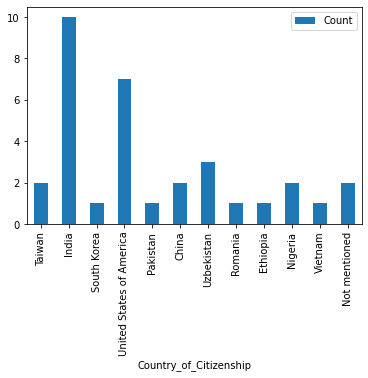

In [344]:
Taiwan_counter = p3_df[p3_df.Country_of_Citizenship == 'Taiwan'].shape[0]
India_counter = p3_df[p3_df.Country_of_Citizenship == 'India'].shape[0]
SouthKorea_counter = p3_df[p3_df.Country_of_Citizenship == 'South Korea'].shape[0]
USA_counter = p3_df[p3_df.Country_of_Citizenship == 'United States of America'].shape[0]
Pak_counter = p3_df[p3_df.Country_of_Citizenship == 'Pakistan'].shape[0]
China_counter = p3_df[p3_df.Country_of_Citizenship == 'China'].shape[0]
Uzbekistan_counter = p3_df[p3_df.Country_of_Citizenship == 'Uzbekistan'].shape[0]
Romania_counter = p3_df[p3_df.Country_of_Citizenship == 'Romania'].shape[0]
Ethiopia_counter = p3_df[p3_df.Country_of_Citizenship == 'Ethiopia'].shape[0]
Nigeria_counter = p3_df[p3_df.Country_of_Citizenship == 'Nigeria'].shape[0]
Vietnam_counter = p3_df[p3_df.Country_of_Citizenship == 'Vietnam'].shape[0]
Notmention_counter = p3_df[p3_df.Country_of_Citizenship == 'Not mentioned'].shape[0]

c_df = pd.DataFrame({'Country_of_Citizenship':['Taiwan', 'India', 'South Korea', 'United States of America', 'Pakistan', 'China', 'Uzbekistan', 'Romania', 'Ethiopia', 'Nigeria', 'Vietnam', 'Not mentioned'], 'Count':[Taiwan_counter, India_counter, SouthKorea_counter, USA_counter, Pak_counter, China_counter, Uzbekistan_counter, Romania_counter, Ethiopia_counter, Nigeria_counter, Vietnam_counter, Notmention_counter]})
ax_2 = c_df.plot.bar(x='Country_of_Citizenship', y='Count', rot=90)

People who are working while studying vs the people who are studying and not working

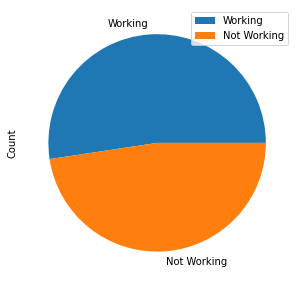

In [345]:
WorkingF_counter = p3_df[p3_df['Are_you_employed_full_time_while_attending_Mason?'] == 'Yes, Full Time'].shape[0]
WorkingnotF_counter = p3_df[p3_df['Are_you_employed_full_time_while_attending_Mason?'] == 'Working, but not Full Time'].shape[0]
Notworking_counter = p3_df[p3_df['Are_you_employed_full_time_while_attending_Mason?'] == 'Not Working while attending Mason'].shape[0]
Total_working = WorkingF_counter + WorkingF_counter

d_df = pd.DataFrame({'Count':[Total_working, Notworking_counter]}, index = ['Working', 'Not Working'])
ax_3 = d_df.plot.pie(y='Count', figsize = (5,5))

The above pie chart shows the usual trend that most of the students studying tend to work while studying so that they could afford to pay their household expenses.

Below are bar charts that show participants' programming skills in various languages so that the instructor knows how to lead the course on these programming languages.

In Python

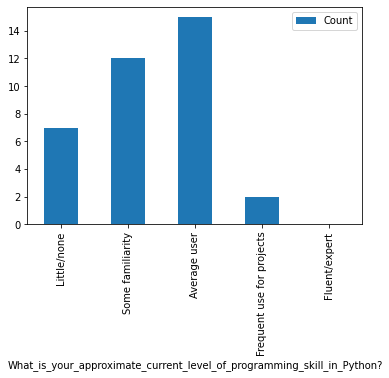

In [346]:
Little_counter = p3_df[p3_df['What_is_your_approximate_current_level_of_programming_skill_in_Python?'] == 'Little/none'].shape[0]
Some_counter = p3_df[p3_df['What_is_your_approximate_current_level_of_programming_skill_in_Python?'] == 'Some familiarity'].shape[0]
Avg_counter = p3_df[p3_df['What_is_your_approximate_current_level_of_programming_skill_in_Python?'] == 'Average user'].shape[0]
Freq_counter = p3_df[p3_df['What_is_your_approximate_current_level_of_programming_skill_in_Python?'] == 'Frequent use for projects'].shape[0]
Exp_counter = p3_df[p3_df['What_is_your_approximate_current_level_of_programming_skill_in_Python?'] == 'Fluent/expert'].shape[0]


e_df = pd.DataFrame({'What_is_your_approximate_current_level_of_programming_skill_in_Python?':['Little/none', 'Some familiarity', 'Average user', 'Frequent use for projects', 'Fluent/expert'], 'Count':[Little_counter, Some_counter, Avg_counter, Freq_counter, Exp_counter]})
ax_4 = e_df.plot.bar(x='What_is_your_approximate_current_level_of_programming_skill_in_Python?', y='Count', rot=90)

In python, instructor would not have to maybe go over the basics of python in detail because most of the people have small grip over the language.

In R

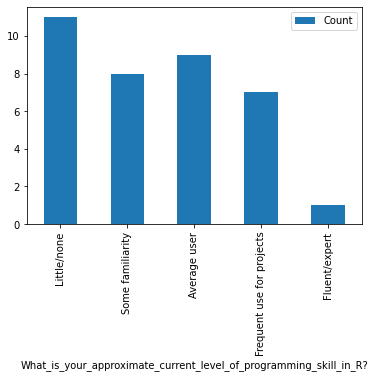

In [347]:
Little_counter = p3_df[p3_df['What_is_your_approximate_current_level_of_programming_skill_in_R?'] == 'Little/none'].shape[0]
Some_counter = p3_df[p3_df['What_is_your_approximate_current_level_of_programming_skill_in_R?'] == 'Some familiarity'].shape[0]
Avg_counter = p3_df[p3_df['What_is_your_approximate_current_level_of_programming_skill_in_R?'] == 'Average user'].shape[0]
Freq_counter = p3_df[p3_df['What_is_your_approximate_current_level_of_programming_skill_in_R?'] == 'Frequent use for projects'].shape[0]
Exp_counter = p3_df[p3_df['What_is_your_approximate_current_level_of_programming_skill_in_R?'] == 'Fluent/expert'].shape[0]


e_df = pd.DataFrame({'What_is_your_approximate_current_level_of_programming_skill_in_R?':['Little/none', 'Some familiarity', 'Average user', 'Frequent use for projects', 'Fluent/expert'], 'Count':[Little_counter, Some_counter, Avg_counter, Freq_counter, Exp_counter]})
ax_4 = e_df.plot.bar(x='What_is_your_approximate_current_level_of_programming_skill_in_R?', y='Count', rot=90)

In R, instructor would have to go over the basics in detail because a lot of people do now know about the basics of the language.

In SQL

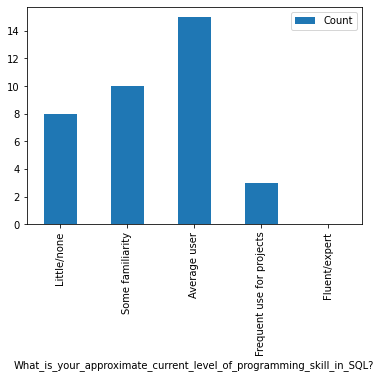

In [348]:
Little_counter = p3_df[p3_df['What_is_your_approximate_current_level_of_programming_skill_in_SQL?'] == 'Little/none'].shape[0]
Some_counter = p3_df[p3_df['What_is_your_approximate_current_level_of_programming_skill_in_SQL?'] == 'Some familiarity'].shape[0]
Avg_counter = p3_df[p3_df['What_is_your_approximate_current_level_of_programming_skill_in_SQL?'] == 'Average user'].shape[0]
Freq_counter = p3_df[p3_df['What_is_your_approximate_current_level_of_programming_skill_in_SQL?'] == 'Frequent use for projects'].shape[0]
Exp_counter = p3_df[p3_df['What_is_your_approximate_current_level_of_programming_skill_in_SQL?'] == 'Fluent/expert'].shape[0]


e_df = pd.DataFrame({'What_is_your_approximate_current_level_of_programming_skill_in_SQL?':['Little/none', 'Some familiarity', 'Average user', 'Frequent use for projects', 'Fluent/expert'], 'Count':[Little_counter, Some_counter, Avg_counter, Freq_counter, Exp_counter]})
ax_4 = e_df.plot.bar(x='What_is_your_approximate_current_level_of_programming_skill_in_SQL?', y='Count', rot=90)

The instructor would have to touch over the basics of the language since greater number of participants don't have languge of SQL.